In [10]:
import random

import numpy as np
import scipy.integrate as integrate
import scipy.special as special

from matplotlib import pyplot as plt

from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

import csv

In [3]:
# the analytical representation of exact solution
def heat_equ_analytical_solu(x, t):
    return np.sin(np.pi * x) * np.exp(-np.power(np.pi, 2) * t)

In [4]:
# ==========
# helping methods
# ==========

# generate a list from lower and upper bound
def gen_list(p0, pn, delta, dig=5):
    ret = []
    i = p0
    while i < pn:
        ret.append(float(i))
        i += delta
        i = round(i, dig)
    return ret

# padding and zero padding
def padding(origin, a_list, b_list):
    return np.hstack((a_list, origin, b_list))

def zero_padding(origin, num):
    zero_list = [0 for i in range(num)]
    return padding(origin, zero_list, zero_list)

In [5]:
# ==============
# getting trainning data
# ==============

# trainning pairs
def gen_pair(u, x, t, length=3, num=1000):
    pairs = []
    for i in range(num):
        r = random.randint(0, t-2)
        current_t = u[r]
        next_t = u[r+1]
        p = random.randint(length, x-1-length)
        train = current_t[p-length:p+length+1]
        solu = next_t[p]
        pair = {'input': train, 'solu': solu}
        pairs.append(pair)
    return pairs

# trainning pairs (in average)
def gen_pair_ave(u, x, t, length=3, num=1000):
    pairs = []
    for i in range(num):
        r = random.randint(0, t-2)
        current_t = u[r]
        next_t = u[r+1]
        p = random.randint(length, x-2-length)
        train0 = current_t[p-length:p+length+2]
        solu1 = next_t[p]
        solu2 = next_t[p+1]
        train = []
        for j in range(len(train0)-1):
                train.append(0.5 * (train0[j] + train0[j+1]))
        solu = 0.5 * (solu1 + solu2)
        pair = {'input': train, 'solu': solu}
        pairs.append(pair)
    return pairs

# trainning pairs (in cell average)
def gen_pair_cell_ave(u, x, t, delta_x, delta_y, length=3, num=1000):
    pairs = []
    for i in range(num):
        t_index = random.randint(0, len(t)-2)
        x_s = random.randint(0, len(x)-2*length-3)
        x_e = x_s+2*length+2
        starting = x[x_s]
        ending = x[x_e]
        input_data = []
        for i in range(x_s, x_e-1):
            value = integrate.quad(lambda x: heat_equ_analytical_solu(x, t[t_index]), x[i], x[i+1])
            value = value[0] * (1/delta_x)
            input_data.append(value)
        target_data = integrate.quad(lambda x: heat_equ_analytical_solu(x, t[t_index+1]), x[x_s+length], x[x_s+length+1])
        target_data = target_data[0] * (1/delta_x)
        pair = {'input': input_data, 'solu': target_data}
        pairs.append(pair)
    return pairs

In [108]:
def analysising_the_model(delta_x=1/20, delta_t=1/20, xmin=0, ymin=0, xmax=2 * np.pi, ymax=2 * np.pi,
                          figsize = (18,12), the_final=True, time=0,
                          error_file='list_of_error_11 xx.txt', prediction_file='list_of_prediction_11 xx.txt'):
    x = arange(xmin, xmax, delta_x)
    t = arange(ymin, ymax, delta_t)
    print("Generating meshes...")
    X,T = meshgrid(x, t) # grid of point
    print("Generating analytical solution...")
    Z = heat_equ_analytical_solu(X, T) # evaluation of the function on the grid
    print("Calculate the cell average...")
    fixed_Z = []
    for time, zz in enumerate(Z):
        zz = np.hstack((zz, [0])).tolist()
        fixed_zz = []
        for j in range(len(zz)-1-1):
            value = integrate.quad(lambda x: heat_equ_analytical_solu(x, t[time]), x[j], x[j+1])
            fixed_zz.append(value)
        fixed_Z.append(fixed_zz)
    print("Reading the prediction data from file...")
    prediction_str = []
    with open(prediction_file, 'r') as f:
        reader = csv.reader(f)
        for i, row in enumerate(reader):
            if i%2==0:
                prediction_str.append(row)
    prediction = []
    print("Organizing from [string] to [float]...")
    for p in prediction_str:
        prediction.append(np.array([float(i) for i in p]))
    function_1 = []
    print("Graphing")
    plt.figure(figsize = figsize)
    coord = x[:-1]
    if the_final:
        print(len(x))
        print(len(prediction[0]))
        print(len(Z[0]))
        print(len(fixed_Z[0]))
        plt.plot(coord, prediction[10], coord, fixed_Z[10])
#         plt.plot(x[:-1], prediction[len(prediction)-1])
#         , x, Z[len(Z)-1]
#         plt.plot(coord, prediction[len(prediction)-1], coord, fixed_Z[len(fixed_Z)-1-1])
    else:
        plt.plot(coord, prediction[time], coord, fixed_Z[time])

Generating meshes...
Generating analytical solution...
Calculate the cell average...
Reading the prediction data from file...
Organizing from [string] to [float]...
Graphing
126
126
126
125


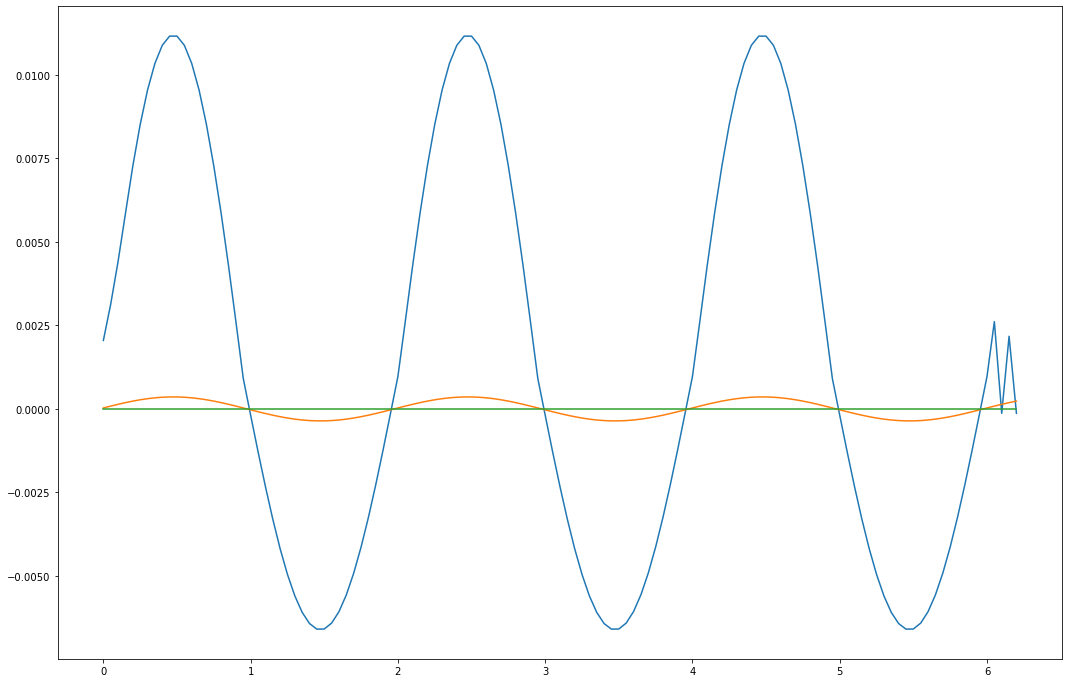

In [109]:
analysising_the_model(delta_x=1/20, delta_t=1/20, xmin=0, ymin=0, xmax=2 * np.pi, ymax=2 * np.pi,
                          figsize = (18,12), the_final=True, time=1,
                          error_file='./prediction/error pairs_20_20 iteration=1 layers=1 xx.csv', prediction_file='./prediction/prediction pairs_20_20 iteration=1 layers=1 xx.csv')

In [70]:
x_1 = arange(0, 2 * np.pi, 1/20)
t_1 = arange(0, 2 * np.pi, 1/20)
X_1,T_1 = meshgrid(x_1, t_1) # grid of point
Z_1 = heat_equ_analytical_solu(X_1, T_1) # evaluation of the function on the grid

In [71]:
import csv

prediction_1_str = []
with open('./prediction/error pairs_20_20 iteration=1 layers=1 xx', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i%2==0:
            prediction_1_str.append(row)
            
prediction_1 = []
for p in prediction_1_str:
    prediction_1.append(np.array([float(i) for i in p]))

In [72]:
function_1 = []
for zz in Z_1:
    zz_fix = []
    for i in range(len(zz)-1):
        zz_fix.append(0.5 * (zz[i] + zz[i+1]))
    zz_fix.append(zz[i+1])
    function_1.append(zz_fix)

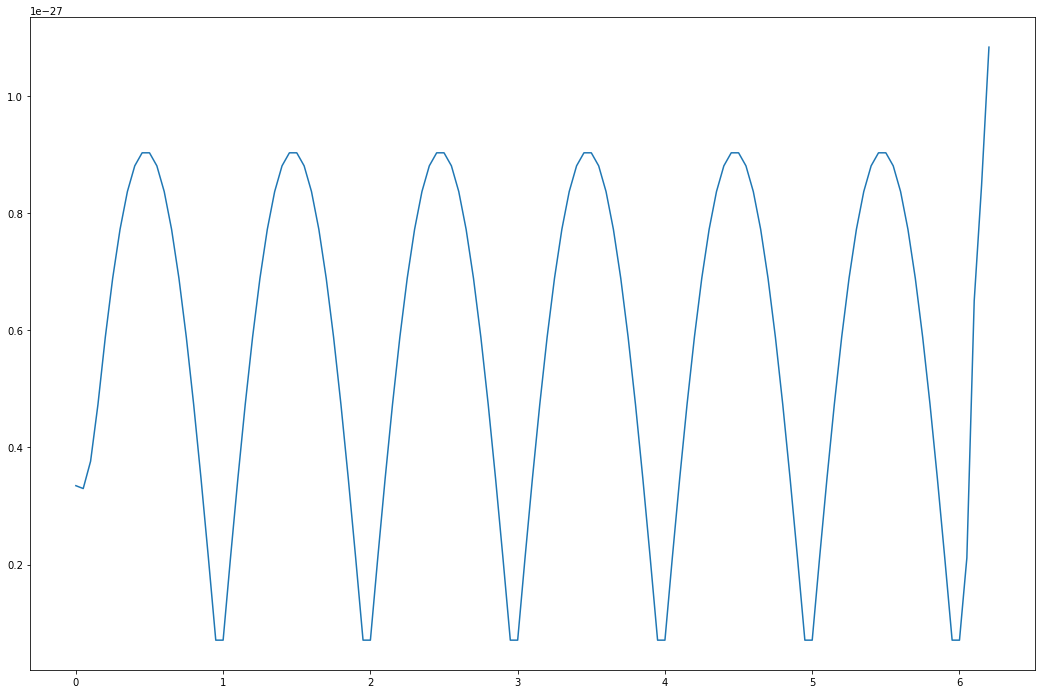

In [87]:
plt.figure(figsize = (18,12))
# plt.ylim((-10e-27, 10e-27))
x_11 = x_1[:-1]
plt.plot(x_11, prediction_1[len(prediction_1)-1])